# **PARCIAL 1**
## **TEORÍA DE APRENDIZAJE DE MAQUINAS**

Genere una simulación sobre Python de los regresores por máxima verosimilitud y máximo a-posteriori, discutidos en el punto 2.1, para ajustar la señal:
${t}_n = \cos\left[\frac{x_n}{3}\right] + \cos\left[\frac{x_n}{4}\right] + \eta_n,$ con $x_n \in [0, 24\pi]$,
contaminada con ruido blanco Gaussiano
$\eta_n ( \textit{SNR}_{\textit{dB}} = 2 [dB])$.
Asuma mapeo $ \phi(\cdot)$ del tipo polinomial de orden
$ Q$ y prior $p(w) = \mathcal{N}(w|0, \sigma^2_w)$.
Simule 500 datos para entrenar los modelos y 200 para predecir. Incluya normalización por $MinMaxScaler()$ de $sklearn$ después de generar el mapeo no lineal.

### **Librerías**

In [16]:
# Importamos librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### **Funciones**

In [17]:
def max_ver(X, W):
    """
    Calcula la predicción utilizando el modelo de regresión lineal
    con la máxima verosimilitud.

    Parámetros:
        - X: Conjunto de datos de entrada.
        - W: Parámetros del modelo de regresión.

    Retorna:
        - y: Predicción del modelo para el conjunto de datos X.
    """

    #Determinar el grado del polinomio utilizado en el modelo
    Q = W.shape[1] - 1

    #Representar los datos de entrada como un polinomio de grado Q
    phiQ = PolynomialFeatures(degree=Q)
    Phi = phiQ.fit_transform(X)

    #Normalizar los datos utilizando el mismo escalador que se utilizó durante el entrenamiento
    Phi = scaler.transform(Phi)

    #Agregar una columna de unos al principio de la matriz Phi
    #Esto es necesario para calcular el término de sesgo del modelo
    Phi[:, 0] = 1

    #Calcular la predicción utilizando los parámetros del modelo
    y = Phi @ W.T

    return y

def max_apos(X, W):
    """
    Calcula la predicción utilizando el modelo de regresión lineal
    con la máxima a posteriori (MAP).

    Parámetros:
        - X: Conjunto de datos de entrada.
        - W: Parámetros del modelo de regresión (pesos).

    Retorna:
        - y: Predicción del modelo para el conjunto de datos X.
    """

    # Determinar el grado del polinomio utilizado en el modelo
    Q = W.shape[1] - 1

    # Representar los datos de entrada como un polinomio de grado Q
    phiQ = PolynomialFeatures(degree=Q)
    Phi = phiQ.fit_transform(X)

    # Normalizar los datos utilizando el mismo escalador que se utilizó durante el entrenamiento
    Phi = scaler.transform(Phi)

    # Agregar una columna de unos al principio de la matriz Phi
    # Esto es necesario para calcular el término de sesgo del modelo
    Phi[:, 0] = 1

    # Calcular la predicción utilizando los parámetros del modelo
    y = Phi @ W.T

    return y

### *Señal*
$$ t_n = cos(\frac{x_n}{3}) + cos(\frac{x_n}{4}) $$

In [18]:
#Generando los datos de entrada
N = 700                                 #Cantidad de Datos
SNRdB = 2                               #Relación señal-ruido
x_n = np.linspace(0,24*np.pi,N)         #Generación de los datos
tn_pura = np.cos(x_n/3)+np.cos(x_n/4)   #Señal Original

### *SNR*

Para convertir la SNR en una cantidad que refleje la potencia del ruido, primero necesitamos convertir la SNR de decibelios a una escala lineal (proporcional a la potencia). Esto se hace utilizando la fórmula:

$$\text{SNR} = 10 \log_{10} \left( \frac{P_{\text{noise}}}{P_{\text{signal}}} \right)$$

donde: $P_{noise}$ es la potencia del ruido.

Despejando $P_{noise}$ de esta ecuación, obtenemos:

$$P_{\text{noise}} = 10^{\left( \frac{\text{SNR}}{10} \right)} \cdot P_{\text{signal}}$$

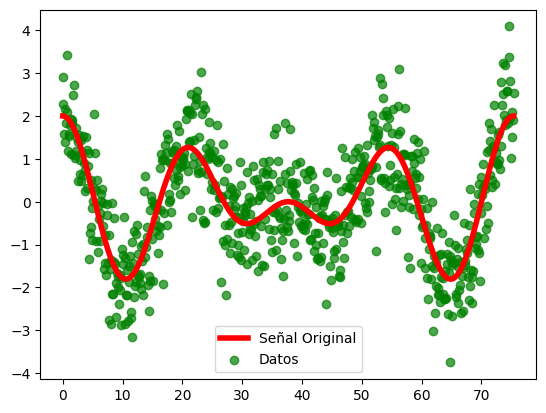

In [19]:
#Calcula la potencia de la Señal Original:
P_signal = np.mean(tn_pura**2)

#Calcula la potencia del ruido (considerando SNR)
P_noise = P_signal / (10**(SNRdB / 10))

#Genera el ruido blanco gaussiano
eta = np.random.normal(0, np.sqrt(P_noise), len(x_n))

#Señal Original + ruido
t_nr= tn_pura + eta

#Grafica la señal dada y los datos con el ruido
plt.plot(x_n,tn_pura,label='Señal Original',c='r',linewidth=4)
plt.scatter(x_n,t_nr, alpha=0.7, c = 'green', label="Datos")
plt.legend()
plt.show()

### *Datos de entrenamiento*

In [20]:
#Dividir los datos en conjuntos de entrenamiento y prueba utilizando train_test_split.

X_train, X_test, t_train, t_test = train_test_split(x_n.reshape(-1,1), t_nr.reshape(-1,1),test_size=200/N, random_state=42)
print(X_train.shape,X_test.shape,t_train.shape,t_test.shape)

(500, 1) (200, 1) (500, 1) (200, 1)


### *Mapeo $ \phi(\cdot) $*

Para el entrenamiento y realizar el mapeo $ \phi(\cdot)$ del tipo polinomial de orden $Q$ se utilizó la libreria sklearn para facilitar la generación de las características.

In [21]:
#Mapeo de Representación polinomial desde la libreria 'sklearn', para entrenamiento

#Definir el grado del polinomio
Q = 25

#Crear un objeto 'PolynomialFeatures' para generar características polinomiales hasta el grado especificado
phiQ = PolynomialFeatures(degree=Q)

#Representar los datos de entrenamiento como un polinomio de grado 'Q'
Phi = phiQ.fit_transform(X_train)

#Escalar los datos utilizando 'MinMaxScaler'
scaler = MinMaxScaler()
scaler.fit(Phi)
Phi = scaler.transform(Phi)

#Asegurar que la primera columna de Phi sea 1 para el término de sesgo del modelo
Phi[:, 0] = 1  #Como da una columna de 0, se cambia por columna de 1 para poder calcular la inversa y preservar la estabilidad computacional


# **Maxima Verosimilitud**

Obtenidos los pesos en el punto 2.1, se tiene que :

$$W_{ML}=t_{n}^{T} \phi\left (  \phi ^{T}\phi \right )^{-1}$$



In [22]:
#Máxima Verosimilitud
W_ml= t_train.T@Phi@(np.linalg.inv(Phi.T@Phi)) #Calcular los pesos del modelo por ML

### *Predict*

In [23]:
t_predictML= max_ver( X_test,W_ml) #Predicción de ML

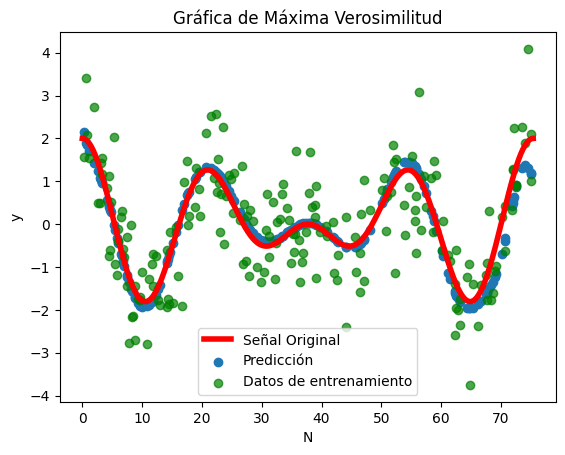

In [24]:
#Graficar la señal verdadera (valores reales)
plt.plot(x_n, tn_pura, label="Señal Original", c ="r", linewidth=4)

#Graficar la predicción del modelo de Maxima Verosimilitud
plt.scatter(X_test, t_predictML, label="Predicción")

#Graficar los datos de entrenamiento
plt.scatter(X_test, t_test, color="green", alpha=0.7, label="Datos de entrenamiento")

#Agregar etiquetas y leyenda
plt.xlabel('N')
plt.ylabel('y')
plt.title('Gráfica de Máxima Verosimilitud')
plt.legend()

#Mostrar la gráfica
plt.show()

In [25]:
mae = mean_absolute_error(t_test, t_predictML) #calculo del error absoluto, respecto a los datos de testeo y la predición en dichos datos.
mae

0.6948943804080103

# **Máximo Aposteriori**

Obtenidos los pesos en el punto 2.1, se tiene que para MAP :

$$W_{MAP}=t_{n}^{T} \phi\left (  \phi ^{T}\phi+\lambda I \right )^{-1}$$
siendo:
$$\lambda= \frac{\sigma ^{2}_{\eta }}{\sigma ^{2}_{\omega}}$$

In [26]:
Lambda= 2 #Priori dado por la varianza del ruido y de los pesos.
W_map= t_train.T@Phi@(np.linalg.inv(Phi.T@Phi+Lambda)) #Pesos de MAP
t_predictMAP= max_apos( X_test,W_map) #predicción de MAP

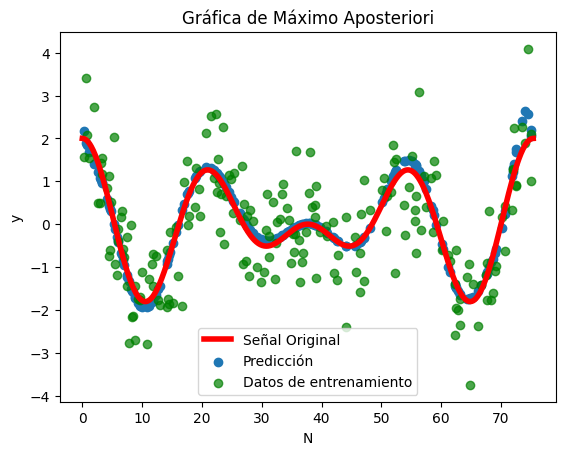

In [27]:
# Graficar la señal verdadera (valores reales)
plt.plot(x_n, tn_pura, label="Señal Original", c="r", linewidth=4)

# Graficar la predicción del modelo bayesiano
plt.scatter(X_test, t_predictMAP, label="Predicción")

# Graficar los datos de entrenamiento
plt.scatter(X_test, t_test, color="green", alpha=0.7, label="Datos de entrenamiento")

# Agregar etiquetas y leyenda
plt.xlabel('N')
plt.ylabel('y')
plt.title('Gráfica de Máximo Aposteriori')
plt.legend()

# Mostrar la gráfica
plt.show()

In [28]:
mae = mean_absolute_error(t_test, t_predictMAP) #calculo del error absoluto, respecto a los datos de testeo y la predición en dichos datos.
mae

0.6847723083095372